In [9]:
import numpy as np
from scipy.fftpack import fft
import matplotlib.pyplot as plt
from scipy import signal

In [2]:
def return_array(path, col_num):
    ret_arr = []
    with open(path) as f:
        for line in f:
            data = list(map(int, line.split()))
            ret_arr.append(data[col_num])

    return ret_arr

In [64]:
path = "D:/Academics/Projects/VelaPulsar/data/ch00_B0833-45_20150612_191438_010_1"
N_arr = return_array(path, 1)
print(f"The N_arr was read with number of elements: {len(N_arr)}")

The N_arr was read with number of elements: 30720000


In [65]:
bandwidth = 16.5
fs = 2 * bandwidth
chunksize = 512

In [66]:
iterations = len(N_arr)//chunksize
power = np.zeros(chunksize)
powerlog = []
for i in range(iterations - 1):
    focus_arr = N_arr[i * chunksize : (i + 1) * chunksize]
    focusfourier = fft(focus_arr)
    powerfocus = np.array([np.power(abs(j), 2) for j in focusfourier])
    powerlog.append(powerfocus[:chunksize//2])
    power = power + powerfocus

power = np.divide(power, iterations)
print("The average power has been calculated")

The average power has been calculated


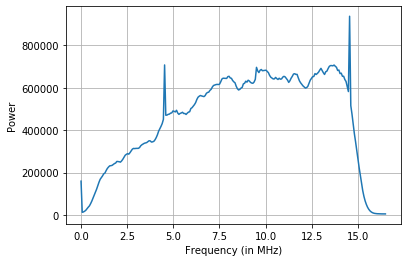

In [67]:
freq_interval = np.linspace(0.0, fs/2.0, chunksize//2)
plt.plot(freq_interval, power[0:chunksize//2])
plt.grid()
plt.xlabel("Frequency (in MHz)")
plt.ylabel("Power")
plt.show()

In [80]:
time_chunk = 60 #M
time_instances = iterations // time_chunk  #The X-axis
powerlog.append(np.zeros(chunksize//2))

Z = []
for i in range(time_instances):
    power_arr = powerlog[(i*time_chunk):(i+1)*time_chunk]
    avg_power = [sum(k) for k in zip(*power_arr)]
    avg_power = [k/time_chunk for k in avg_power]
    avg_power.reverse()
    Z.append(avg_power)
    
    
Z = list(map(list, zip(*Z)))

[]

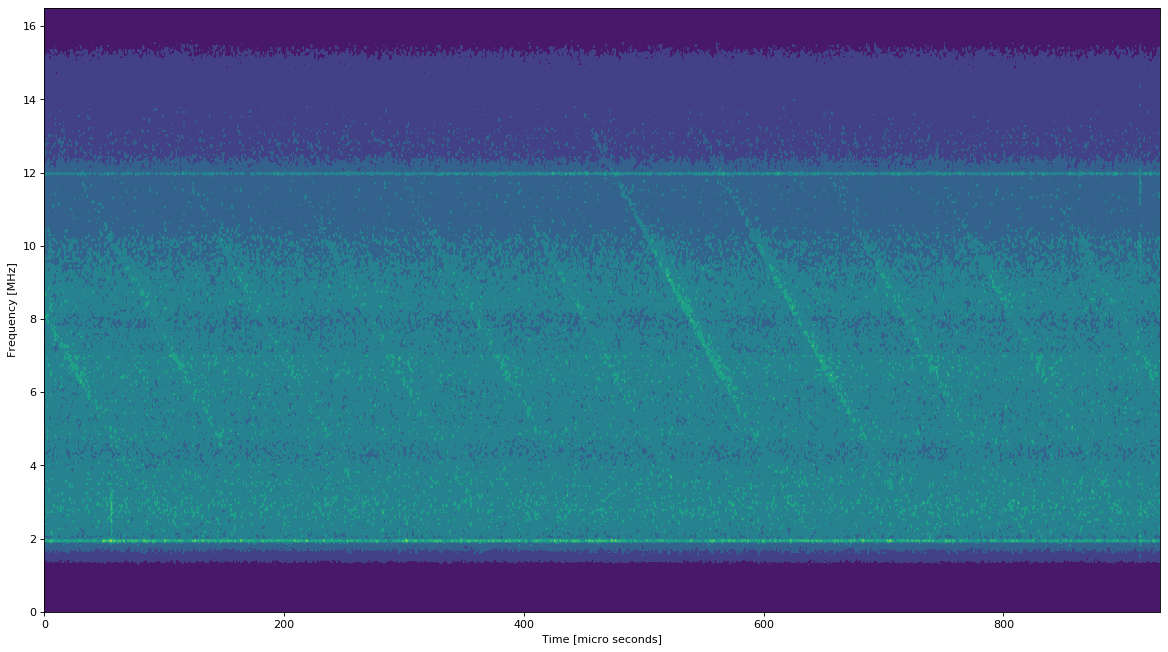

In [81]:
X = np.linspace(0, (time_chunk * chunksize)/fs, time_instances)
plt.figure(figsize=(18, 10), dpi= 80, facecolor='w', edgecolor='k')
plt.contourf(X, freq_interval, Z)
plt.xlabel("Time [micro seconds]")
plt.ylabel("Frequency [MHz]")
plt.plot()

In [62]:
print(len(X))

1001
